In [1]:
import pandas as pd
df= pd.read_parquet('/home/ec2-user/mlmodel.parquet')
df.to_csv('mlmodeldata.csv')

In [2]:
import pandas as pd
df2= pd.read_csv('./mlmodeldata.csv')
df2

,Unnamed: 0,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelay,...,OriginAirportID,OriginCityName,OriginState,OriginStateName,DestAirportID,DestCityName,DestState,DestStateName,CRSArrTime,ArrDelay
0,0,2020-09-01,Comair Inc.,PHL,DAY,False,False,1905,1858.0,-7.0,...,14100,"Philadelphia, PA",PA,Pennsylvania,11267,"Dayton, OH",OH,Ohio,2056,-22.0
1,1,2020-09-02,Comair Inc.,PHL,DAY,False,False,1905,1858.0,-7.0,...,14100,"Philadelphia, PA",PA,Pennsylvania,11267,"Dayton, OH",OH,Ohio,2056,-29.0
2,2,2020-09-03,Comair Inc.,PHL,DAY,False,False,1905,1855.0,-10.0,...,14100,"Philadelphia, PA",PA,Pennsylvania,11267,"Dayton, OH",OH,Ohio,2056,26.0
3,3,2020-09-04,Comair Inc.,PHL,DAY,False,False,1905,1857.0,-8.0,...,14100,"Philadelphia, PA",PA,Pennsylvania,11267,"Dayton, OH",OH,Ohio,2056,-29.0
4,4,2020-09-05,Comair Inc.,PHL,DAY,False,False,1905,1856.0,-9.0,...,14100,"Philadelphia, PA",PA,Pennsylvania,11267,"Dayton, OH",OH,Ohio,2056,-30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12382838,1048570,2022-02-11,United Air Lines Inc.,FAT,DEN,False,False,1325,1329.0,4.0,...,11638,"Fresno, CA",CA,California,11292,"Denver, CO",CO,Colorado,1640,5.0
12382839,1048571,2022-02-11,United Air Lines Inc.,EWR,PBI,False,False,1500,1502.0,2.0,...,11618,"Newark, NJ",NJ,New Jersey,14027,"West Palm Beach/Palm Beach, FL",FL,Florida,1801,26.0
12382840,1048572,2022-02-11,United Air Lines Inc.,DEN,LAS,False,False,1135,1129.0,-6.0,...,11292,"Denver, CO",CO,Colorado,12889,"Las Vegas, NV",NV,Nevada,1233,-8.0
12382841,1048573,2022-02-11,United Air Lines Inc.,HNL,SFO,False,False,800,748.0,-12.0,...,12173,"Honolulu, HI",HI,Hawaii,14771,"San Francisco, CA",CA,California,1455,-19.0


In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics, linear_model
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report
data = pd.read_csv('./mlmodeldata.csv', nrows=50000)
data

,Unnamed: 0,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelay,...,OriginAirportID,OriginCityName,OriginState,OriginStateName,DestAirportID,DestCityName,DestState,DestStateName,CRSArrTime,ArrDelay
0,0,2020-09-01,Comair Inc.,PHL,DAY,False,False,1905,1858.0,-7.0,...,14100,"Philadelphia, PA",PA,Pennsylvania,11267,"Dayton, OH",OH,Ohio,2056,-22.0
1,1,2020-09-02,Comair Inc.,PHL,DAY,False,False,1905,1858.0,-7.0,...,14100,"Philadelphia, PA",PA,Pennsylvania,11267,"Dayton, OH",OH,Ohio,2056,-29.0
2,2,2020-09-03,Comair Inc.,PHL,DAY,False,False,1905,1855.0,-10.0,...,14100,"Philadelphia, PA",PA,Pennsylvania,11267,"Dayton, OH",OH,Ohio,2056,26.0
3,3,2020-09-04,Comair Inc.,PHL,DAY,False,False,1905,1857.0,-8.0,...,14100,"Philadelphia, PA",PA,Pennsylvania,11267,"Dayton, OH",OH,Ohio,2056,-29.0
4,4,2020-09-05,Comair Inc.,PHL,DAY,False,False,1905,1856.0,-9.0,...,14100,"Philadelphia, PA",PA,Pennsylvania,11267,"Dayton, OH",OH,Ohio,2056,-30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49995,2020-09-19,Southwest Airlines Co.,RSW,STL,False,False,1100,1054.0,-6.0,...,14635,"Fort Myers, FL",FL,Florida,15016,"St. Louis, MO",MO,Missouri,1225,-9.0
49996,49996,2020-09-19,Southwest Airlines Co.,SAN,AUS,False,False,800,758.0,-2.0,...,14679,"San Diego, CA",CA,California,10423,"Austin, TX",TX,Texas,1245,-9.0
49997,49997,2020-09-19,Southwest Airlines Co.,SAN,BNA,False,False,1150,1151.0,1.0,...,14679,"San Diego, CA",CA,California,10693,"Nashville, TN",TN,Tennessee,1745,-17.0
49998,49998,2020-09-19,Southwest Airlines Co.,SAN,BWI,False,False,630,629.0,-1.0,...,14679,"San Diego, CA",CA,California,10821,"Baltimore, MD",MD,Maryland,1435,-22.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       50000 non-null  int64  
 1   FlightDate                       50000 non-null  object 
 2   Airline                          50000 non-null  object 
 3   Origin                           50000 non-null  object 
 4   Dest                             50000 non-null  object 
 5   Cancelled                        50000 non-null  bool   
 6   Diverted                         50000 non-null  bool   
 7   CRSDepTime                       50000 non-null  int64  
 8   DepTime                          49230 non-null  float64
 9   DepDelay                         49230 non-null  float64
 10  ArrTime                          49214 non-null  float64
 11  ArrDelayMinutes                  49168 non-null  float64
 12  AirTime           

In [7]:
tails = data.groupby('Airline')
tails.head(10)

,Unnamed: 0,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelay,...,OriginAirportID,OriginCityName,OriginState,OriginStateName,DestAirportID,DestCityName,DestState,DestStateName,CRSArrTime,ArrDelay
0,0,2020-09-01,Comair Inc.,PHL,DAY,False,False,1905,1858.0,-7.0,...,14100,"Philadelphia, PA",PA,Pennsylvania,11267,"Dayton, OH",OH,Ohio,2056,-22.0
1,1,2020-09-02,Comair Inc.,PHL,DAY,False,False,1905,1858.0,-7.0,...,14100,"Philadelphia, PA",PA,Pennsylvania,11267,"Dayton, OH",OH,Ohio,2056,-29.0
2,2,2020-09-03,Comair Inc.,PHL,DAY,False,False,1905,1855.0,-10.0,...,14100,"Philadelphia, PA",PA,Pennsylvania,11267,"Dayton, OH",OH,Ohio,2056,26.0
3,3,2020-09-04,Comair Inc.,PHL,DAY,False,False,1905,1857.0,-8.0,...,14100,"Philadelphia, PA",PA,Pennsylvania,11267,"Dayton, OH",OH,Ohio,2056,-29.0
4,4,2020-09-05,Comair Inc.,PHL,DAY,False,False,1905,1856.0,-9.0,...,14100,"Philadelphia, PA",PA,Pennsylvania,11267,"Dayton, OH",OH,Ohio,2056,-30.0
5,5,2020-09-06,Comair Inc.,PHL,DAY,False,False,1905,1853.0,-12.0,...,14100,"Philadelphia, PA",PA,Pennsylvania,11267,"Dayton, OH",OH,Ohio,2056,-33.0
6,6,2020-09-07,Comair Inc.,PHL,DAY,False,False,1905,1901.0,-4.0,...,14100,"Philadelphia, PA",PA,Pennsylvania,11267,"Dayton, OH",OH,Ohio,2056,-18.0
7,7,2020-09-08,Comair Inc.,PHL,DAY,False,False,1905,1859.0,-6.0,...,14100,"Philadelphia, PA",PA,Pennsylvania,11267,"Dayton, OH",OH,Ohio,2056,-33.0
8,8,2020-09-09,Comair Inc.,PHL,DAY,False,False,1800,1752.0,-8.0,...,14100,"Philadelphia, PA",PA,Pennsylvania,11267,"Dayton, OH",OH,Ohio,1945,-29.0
9,9,2020-09-10,Comair Inc.,PHL,DAY,False,False,1800,1750.0,-10.0,...,14100,"Philadelphia, PA",PA,Pennsylvania,11267,"Dayton, OH",OH,Ohio,1945,-22.0


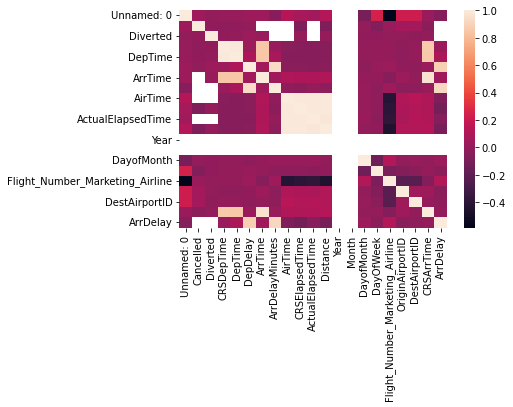

In [8]:
sns.heatmap(data.corr());

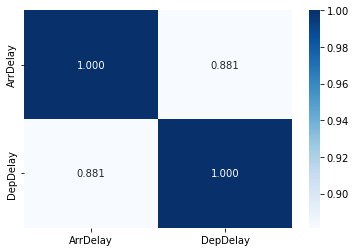

In [9]:
sns.heatmap(data[['ArrDelay','DepDelay']].corr(), annot=True, cmap='Blues',fmt='.3f');

In [10]:
data['DepDelay'].max()

883.0

In [13]:
df_pp = data.copy()
df_pp = df_pp[df_pp.DepDelay > 15]
df_pp

,Unnamed: 0,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelay,...,OriginAirportID,OriginCityName,OriginState,OriginStateName,DestAirportID,DestCityName,DestState,DestStateName,CRSArrTime,ArrDelay
61,61,2020-09-30,Comair Inc.,GSP,CLT,False,False,1602,1659.0,57.0,...,11996,"Greer, SC",SC,South Carolina,11057,"Charlotte, NC",NC,North Carolina,1705,62.0
137,137,2020-09-13,Comair Inc.,JAX,CLT,False,False,1541,1558.0,17.0,...,12451,"Jacksonville, FL",FL,Florida,11057,"Charlotte, NC",NC,North Carolina,1704,10.0
161,161,2020-09-08,Comair Inc.,PHL,SYR,False,False,1910,1929.0,19.0,...,14100,"Philadelphia, PA",PA,Pennsylvania,15096,"Syracuse, NY",NY,New York,2032,-3.0
175,175,2020-09-16,Comair Inc.,PHL,PHF,False,False,1140,1240.0,60.0,...,14100,"Philadelphia, PA",PA,Pennsylvania,14098,"Newport News/Williamsburg, VA",VA,Virginia,1248,48.0
253,253,2020-09-11,Comair Inc.,CLT,OKC,False,False,1336,1419.0,43.0,...,11057,"Charlotte, NC",NC,North Carolina,13851,"Oklahoma City, OK",OK,Oklahoma,1513,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49873,49873,2020-09-19,Southwest Airlines Co.,PHX,LAS,False,False,1815,1903.0,48.0,...,14107,"Phoenix, AZ",AZ,Arizona,12889,"Las Vegas, NV",NV,Nevada,1920,39.0
49877,49877,2020-09-19,Southwest Airlines Co.,PHX,LAX,False,False,1200,1237.0,37.0,...,14107,"Phoenix, AZ",AZ,Arizona,12892,"Los Angeles, CA",CA,California,1325,27.0
49879,49879,2020-09-19,Southwest Airlines Co.,PHX,LAX,False,False,1620,1833.0,133.0,...,14107,"Phoenix, AZ",AZ,Arizona,12892,"Los Angeles, CA",CA,California,1740,128.0
49892,49892,2020-09-19,Southwest Airlines Co.,PHX,MDW,False,False,1820,1851.0,31.0,...,14107,"Phoenix, AZ",AZ,Arizona,13232,"Chicago, IL",IL,Illinois,2330,26.0


In [14]:
missing_columns = df_pp.loc[:, df_pp.isna().mean() >= 0.25].columns
df_pp = df_pp.drop(missing_columns, axis=1)
df_pp

,Unnamed: 0,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelay,...,OriginAirportID,OriginCityName,OriginState,OriginStateName,DestAirportID,DestCityName,DestState,DestStateName,CRSArrTime,ArrDelay
61,61,2020-09-30,Comair Inc.,GSP,CLT,False,False,1602,1659.0,57.0,...,11996,"Greer, SC",SC,South Carolina,11057,"Charlotte, NC",NC,North Carolina,1705,62.0
137,137,2020-09-13,Comair Inc.,JAX,CLT,False,False,1541,1558.0,17.0,...,12451,"Jacksonville, FL",FL,Florida,11057,"Charlotte, NC",NC,North Carolina,1704,10.0
161,161,2020-09-08,Comair Inc.,PHL,SYR,False,False,1910,1929.0,19.0,...,14100,"Philadelphia, PA",PA,Pennsylvania,15096,"Syracuse, NY",NY,New York,2032,-3.0
175,175,2020-09-16,Comair Inc.,PHL,PHF,False,False,1140,1240.0,60.0,...,14100,"Philadelphia, PA",PA,Pennsylvania,14098,"Newport News/Williamsburg, VA",VA,Virginia,1248,48.0
253,253,2020-09-11,Comair Inc.,CLT,OKC,False,False,1336,1419.0,43.0,...,11057,"Charlotte, NC",NC,North Carolina,13851,"Oklahoma City, OK",OK,Oklahoma,1513,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49873,49873,2020-09-19,Southwest Airlines Co.,PHX,LAS,False,False,1815,1903.0,48.0,...,14107,"Phoenix, AZ",AZ,Arizona,12889,"Las Vegas, NV",NV,Nevada,1920,39.0
49877,49877,2020-09-19,Southwest Airlines Co.,PHX,LAX,False,False,1200,1237.0,37.0,...,14107,"Phoenix, AZ",AZ,Arizona,12892,"Los Angeles, CA",CA,California,1325,27.0
49879,49879,2020-09-19,Southwest Airlines Co.,PHX,LAX,False,False,1620,1833.0,133.0,...,14107,"Phoenix, AZ",AZ,Arizona,12892,"Los Angeles, CA",CA,California,1740,128.0
49892,49892,2020-09-19,Southwest Airlines Co.,PHX,MDW,False,False,1820,1851.0,31.0,...,14107,"Phoenix, AZ",AZ,Arizona,13232,"Chicago, IL",IL,Illinois,2330,26.0


In [15]:
df_pp = df_pp[df_pp.Cancelled != 1]
df_pp = df_pp[df_pp.Diverted != 1]
df_pp

,Unnamed: 0,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelay,...,OriginAirportID,OriginCityName,OriginState,OriginStateName,DestAirportID,DestCityName,DestState,DestStateName,CRSArrTime,ArrDelay
61,61,2020-09-30,Comair Inc.,GSP,CLT,False,False,1602,1659.0,57.0,...,11996,"Greer, SC",SC,South Carolina,11057,"Charlotte, NC",NC,North Carolina,1705,62.0
137,137,2020-09-13,Comair Inc.,JAX,CLT,False,False,1541,1558.0,17.0,...,12451,"Jacksonville, FL",FL,Florida,11057,"Charlotte, NC",NC,North Carolina,1704,10.0
161,161,2020-09-08,Comair Inc.,PHL,SYR,False,False,1910,1929.0,19.0,...,14100,"Philadelphia, PA",PA,Pennsylvania,15096,"Syracuse, NY",NY,New York,2032,-3.0
175,175,2020-09-16,Comair Inc.,PHL,PHF,False,False,1140,1240.0,60.0,...,14100,"Philadelphia, PA",PA,Pennsylvania,14098,"Newport News/Williamsburg, VA",VA,Virginia,1248,48.0
253,253,2020-09-11,Comair Inc.,CLT,OKC,False,False,1336,1419.0,43.0,...,11057,"Charlotte, NC",NC,North Carolina,13851,"Oklahoma City, OK",OK,Oklahoma,1513,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49873,49873,2020-09-19,Southwest Airlines Co.,PHX,LAS,False,False,1815,1903.0,48.0,...,14107,"Phoenix, AZ",AZ,Arizona,12889,"Las Vegas, NV",NV,Nevada,1920,39.0
49877,49877,2020-09-19,Southwest Airlines Co.,PHX,LAX,False,False,1200,1237.0,37.0,...,14107,"Phoenix, AZ",AZ,Arizona,12892,"Los Angeles, CA",CA,California,1325,27.0
49879,49879,2020-09-19,Southwest Airlines Co.,PHX,LAX,False,False,1620,1833.0,133.0,...,14107,"Phoenix, AZ",AZ,Arizona,12892,"Los Angeles, CA",CA,California,1740,128.0
49892,49892,2020-09-19,Southwest Airlines Co.,PHX,MDW,False,False,1820,1851.0,31.0,...,14107,"Phoenix, AZ",AZ,Arizona,13232,"Chicago, IL",IL,Illinois,2330,26.0


In [16]:
df_pp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2765 entries, 61 to 49919
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       2765 non-null   int64  
 1   FlightDate                       2765 non-null   object 
 2   Airline                          2765 non-null   object 
 3   Origin                           2765 non-null   object 
 4   Dest                             2765 non-null   object 
 5   Cancelled                        2765 non-null   bool   
 6   Diverted                         2765 non-null   bool   
 7   CRSDepTime                       2765 non-null   int64  
 8   DepTime                          2765 non-null   float64
 9   DepDelay                         2765 non-null   float64
 10  ArrTime                          2765 non-null   float64
 11  ArrDelayMinutes                  2765 non-null   float64
 12  AirTime           

In [24]:
df_pp_selected = df_pp[["Month","Airline","OriginAirportID","DestAirportID","DepTime","ArrTime","AirTime","DepDelay","ArrDelay"]]
df_pp_selected

,Month,Airline,OriginAirportID,DestAirportID,DepTime,ArrTime,AirTime,DepDelay,ArrDelay
61,9,Comair Inc.,11996,11057,1659.0,1807.0,21.0,57.0,62.0
137,9,Comair Inc.,12451,11057,1558.0,1714.0,56.0,17.0,10.0
161,9,Comair Inc.,14100,15096,1929.0,2029.0,41.0,19.0,-3.0
175,9,Comair Inc.,14100,14098,1240.0,1336.0,39.0,60.0,48.0
253,9,Comair Inc.,11057,13851,1419.0,1540.0,126.0,43.0,27.0
...,...,...,...,...,...,...,...,...,...
49873,9,Southwest Airlines Co.,14107,12889,1903.0,1959.0,43.0,48.0,39.0
49877,9,Southwest Airlines Co.,14107,12892,1237.0,1352.0,58.0,37.0,27.0
49879,9,Southwest Airlines Co.,14107,12892,1833.0,1948.0,57.0,133.0,128.0
49892,9,Southwest Airlines Co.,14107,13232,1851.0,2356.0,171.0,31.0,26.0


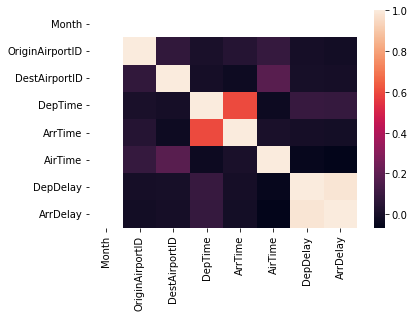

In [25]:
sns.heatmap(df_pp_selected.corr());

In [46]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res)
features_to_encode = ['Airline','OriginAirportID','DestAirportID']

df_pp_enc = encode_and_bind(df_pp_selected, features_to_encode[0])
df_pp_enc = encode_and_bind(df_pp_enc, features_to_encode[1])
df_pp_enc = encode_and_bind(df_pp_enc, features_to_encode[2])

df_pp_enc.head()

,Month,DepTime,ArrTime,AirTime,DepDelay,ArrDelay,Airline_Alaska Airlines Inc.,Airline_Comair Inc.,Airline_Frontier Airlines Inc.,Airline_Horizon Air,Airline_Southwest Airlines Co.
61,9,1659.0,1807.0,21.0,57.0,62.0,0,1,0,0,0
137,9,1558.0,1714.0,56.0,17.0,10.0,0,1,0,0,0
161,9,1929.0,2029.0,41.0,19.0,-3.0,0,1,0,0,0
175,9,1240.0,1336.0,39.0,60.0,48.0,0,1,0,0,0
253,9,1419.0,1540.0,126.0,43.0,27.0,0,1,0,0,0


In [47]:
y = df_pp_enc['DepDelay'].copy()
X = df_pp_enc.drop('DepDelay', axis=1).copy()

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=369)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.8, random_state=369)

In [49]:
lm = LinearRegression()
L_model = lm.fit(X_train,y_train)
L_predictions = pd.DataFrame(lm.predict(X_valid))
print(L_predictions.head(50))
print("MSE =", metrics.mean_squared_error(L_predictions, y_valid))

             0
0    20.176585
1   208.581594
2   426.553412
3    16.410661
4    22.687018
5    18.051113
6    50.080698
7    49.147168
8    19.351202
9    63.511906
10   23.850544
11  190.597907
12   19.959836
13   44.020083
14   16.563783
15   14.374764
16   33.403286
17   14.397641
18   50.776503
19   37.195911
20   83.182348
21   25.566673
22   20.618916
23   14.275758
24   38.672630
25   63.653597
26   32.377515
27   64.327716
28   20.046318
29   34.684758
30   22.970605
31   38.513460
32  122.970126
33   29.906043
34   23.689658
35   12.514527
36   18.191116
37   71.391931
38   31.888733
39   23.355439
40   29.525741
41   34.726918
42   11.939698
43   37.616881
44   31.355444
45   25.944583
46   98.901231
47   26.847189
48   19.450522
49   13.278765
MSE = 116.02060520253548


In [51]:
DT_regr = DecisionTreeRegressor(max_depth=3, random_state=369)
DT_model = DT_regr.fit(X_train,y_train)
DT_predictions = pd.DataFrame(DT_regr.predict(X_valid))
print(DT_predictions.head(50))
print("MSE =", metrics.mean_squared_error(DT_predictions, y_valid))

             0
0    23.619310
1   172.000000
2   411.333333
3    23.619310
4    23.619310
5    23.619310
6    38.568330
7    38.568330
8    23.619310
9    60.448000
10   23.619310
11  172.000000
12   23.619310
13   38.568330
14   23.619310
15   23.619310
16   38.568330
17   23.619310
18   38.568330
19   38.568330
20   89.305556
21   23.619310
22   23.619310
23   23.619310
24   38.568330
25   60.448000
26   38.568330
27   60.448000
28   23.619310
29   38.568330
30   23.619310
31   38.568330
32  121.500000
33   23.619310
34   23.619310
35   23.619310
36   23.619310
37   60.448000
38   38.568330
39   23.619310
40   23.619310
41   38.568330
42   23.619310
43   23.619310
44   38.568330
45   23.619310
46   89.305556
47   23.619310
48   23.619310
49   23.619310
MSE = 747.5768280988062


In [52]:
DT_accuracy = DT_model.score(X_valid, y_valid)
print('DT Accuracy = '+ str(DT_accuracy.round(2)))

DT Accuracy = 0.83


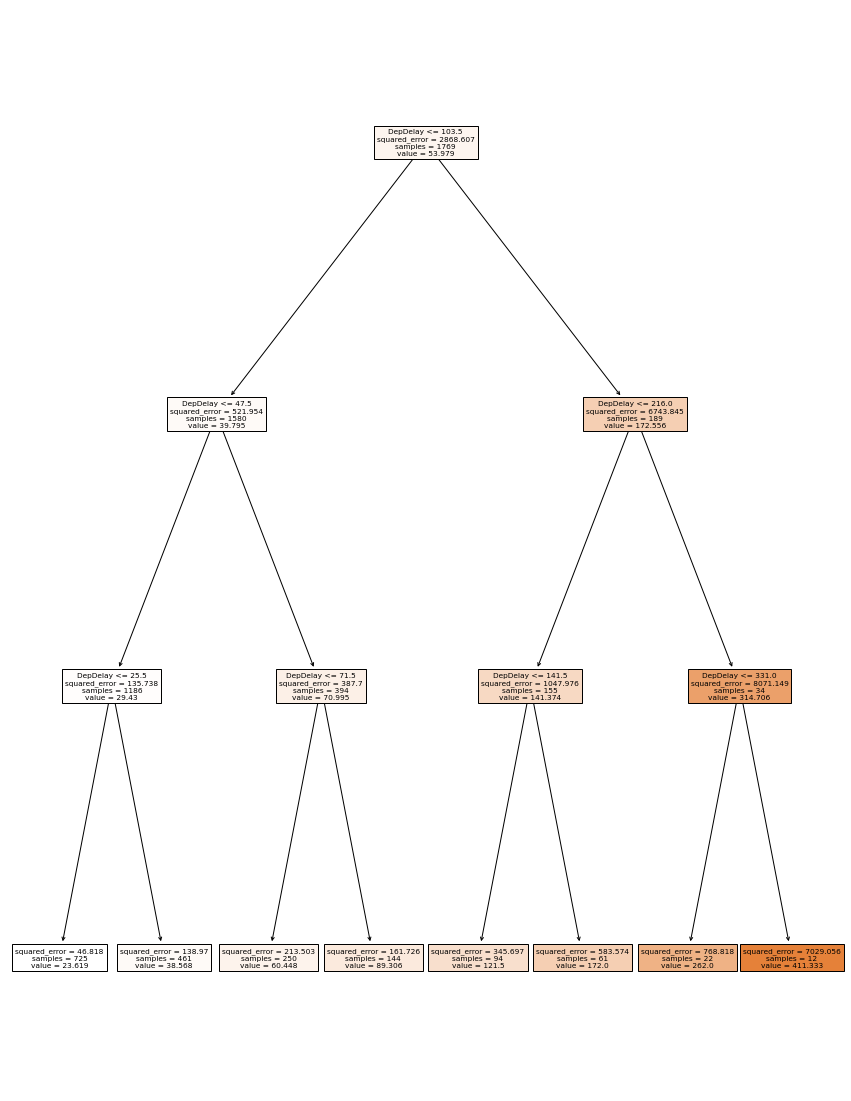

In [53]:
fig = plt.figure(figsize=(15,20))
_ = tree.plot_tree(DT_regr, feature_names=df_pp_enc.columns, filled=True)

Text(0.5, 0, 'max depth')

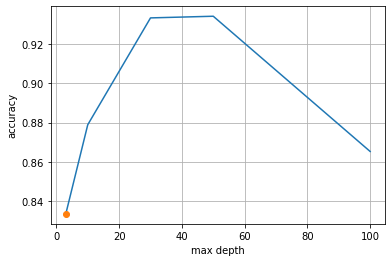

In [54]:
from sklearn.metrics import accuracy_score
max_depth_list = [3,10,30,50,100]

accuracy = []

for x in max_depth_list:
    dtc = DecisionTreeRegressor(max_depth=x) 
    dtc.fit(X_train, y_train)
    accuracy.append(dtc.score(X_valid, y_valid))

plt.plot(max_depth_list, accuracy) 
plt.plot(max_depth_list[0], accuracy[0], marker='o') 
plt.grid() #adds a grid to the plot
plt.ylabel('accuracy') #xlabel
plt.xlabel('max depth') #ylabel

In [55]:
DT_regr = DecisionTreeRegressor(max_depth=100, random_state=369)
DT_model = DT_regr.fit(X_train,y_train)
DT_predictions = pd.DataFrame(DT_regr.predict(X_test))
print("MSE =", metrics.mean_squared_error(DT_predictions, y_test))
DT_accuracy = DT_model.score(X_test, y_test)
print('DT Accuracy on Test Set = '+ str(DT_accuracy.round(2)))

MSE = 188.02893309222424
DT Accuracy on Test Set = 0.94
